In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## ExcelからDataを読み込む

/Users/tobiuo/learning/machine-learning/venv/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


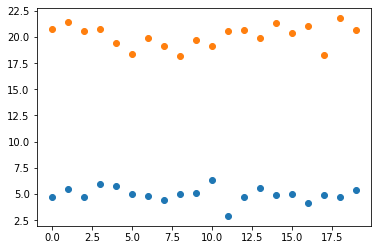

In [2]:
# Excel内の画像などは読み込めないというwarningが出るが, dataは読み込めているため無視する. 
data = pd.read_excel("06-LinearDiscriminantAnalysis.xlsx", usecols=[0, 1], header=3)[:40].astype(np.float64)
data0 = data[:20]
data1 = data[20:]
plt.scatter(range(len(data0)), data0.X)
plt.scatter(range(len(data1)), data1.X)

## 各クラスの平均と基本確率を求める

In [3]:
mean0 = np.mean(data0.X)
mean1 = np.mean(data1.X)
print(str(mean0) +'\t'+ str(mean1))

prob0 = len(data0) / len(data)
prob1 = len(data1) / len(data)
print(str(prob0) +'\t'+ str(prob1))

4.975415506999999	20.087062921
0.5	0.5


## 全体の分散を求める
$variance = \frac{1}{len(x) - len(classes)} \times \Sigma^n_{i=1} (x_i - mean_{class})^2$

In [4]:
# ssd is sum of squared deviation(偏差平方和)
ssd0 = np.sum((mean0 - data0.X)**2)
ssd1 = np.sum((mean1 - data1.X)**2)
variance = (ssd0 + ssd1) / (len(data) - 2)
print((variance))

0.8329315056876604


## 予測してみる
$discriminant = x \times \frac{mean}{variance} - \frac{mean^2}{2 \times variance} + \ln(probability)$

In [5]:
disc0 = (data.X * mean0 / variance) - (mean0**2 / (2 * variance)) + np.log(prob0)
disc1 = (data.X * mean1 / variance) - (mean1**2 / (2 * variance)) + np.log(prob1)
predict = np.where(disc0 > disc1, 0, 1)
for i in range(len(data)):
    print(str(data.X[i]) +'\t'+ str(disc0[i]) +'\t'+ str(disc1[i]) +'\t'+ str(predict[i]))

4.667797637	12.329355797118469	-130.33490382181333	0
5.509198779	17.35536365121942	-110.04358626959547	0
4.702791608	12.538388046200184	-129.49098557339465	0
5.956706641	20.028497685525167	-99.25144007239425	0
5.738622413	18.725797952817246	-104.5107820230833	0
5.027283325	14.476700031796112	-121.66550953819407	0
4.805434058	13.151510294451382	-127.01564956144563	0
4.425689143	10.88315002005458	-136.1736174729094	0
5.009368635	14.369688799995595	-122.09754206761929	0
5.116718815	15.010932103441393	-119.50867394879315	0
6.370917709	22.502737352083102	-89.26228282635938	0
2.895041947	1.7400143087488953	-173.0868646318345	0
4.666842365	12.323649595480346	-130.357941260834	0
5.602154638	17.910624220878475	-107.80185309482854	0
4.902797978	13.73310188281418	-124.66761112860888	0
5.032652964	14.508774920265529	-121.53601476495096	0
4.083972925	8.841949563089115	-144.4144813677446	0
4.875524106	13.57018471044393	-125.3253506656804	0
4.732801047	12.717645796852443	-128.76727481770746	0
5.38599

## 精度を確かめる

In [6]:
accuracy = (predict == data.Y).sum() / len(data)
print(str(accuracy * 100) +'%')

100.0%
